In [6]:
%pip install pandas
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
import pandas as pd

# Path to your CSV file
file_path = 'data/da_quiz/train.csv'

# Reading the CSV file
train_df = pd.read_csv(file_path)

# Displaying the first few rows of the DataFrame
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
train_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


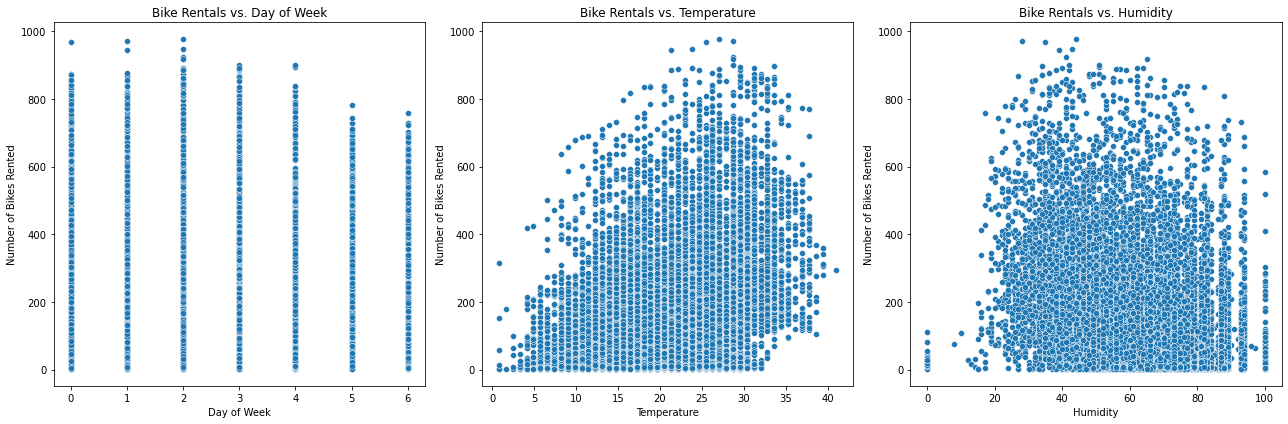

In [10]:
# Extract day of the week (0 = Monday, 6 = Sunday)
train_df['day_of_week'] = train_df['datetime'].dt.dayofweek

# Setting up the matplotlib figure
plt.figure(figsize=(18, 6))

# Scatterplot for number of bikes rented vs. day of the week
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
sns.scatterplot(x='day_of_week', y='count', data=train_df)
plt.title('Bike Rentals vs. Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Bikes Rented')

# Scatterplot for number of bikes rented vs. temperature
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
sns.scatterplot(x='temp', y='count', data=train_df)
plt.title('Bike Rentals vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Number of Bikes Rented')

# Scatterplot for number of bikes rented vs. humidity
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
sns.scatterplot(x='humidity', y='count', data=train_df)
plt.title('Bike Rentals vs. Humidity')
plt.xlabel('Humidity')
plt.ylabel('Number of Bikes Rented')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [11]:
# Calculate correlation coefficients
temp_corr = train_df['count'].corr(train_df['temp'])
humidity_corr = train_df['count'].corr(train_df['humidity'])
day_of_week_corr = train_df['count'].corr(train_df['day_of_week'])

print(f"Correlation of Count with Temperature: {temp_corr}")
print(f"Correlation of Count with Humidity: {humidity_corr}")
print(f"Correlation of Count with Day of Week: {day_of_week_corr}")

Correlation of Count with Temperature: 0.394453644967249
Correlation of Count with Humidity: -0.3173714788765946
Correlation of Count with Day of Week: -0.0022834003807076847


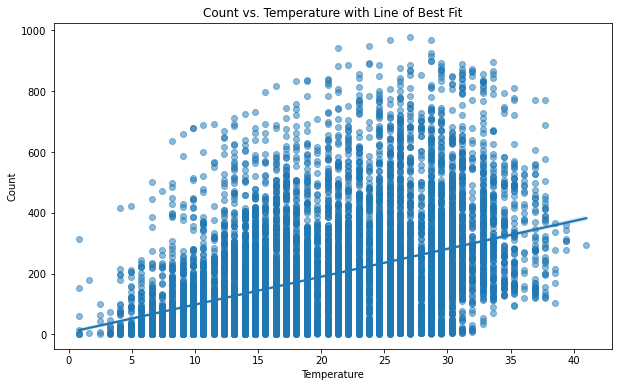

In [12]:
# Scatter plot of count vs. temperature with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='temp', y='count', data=train_df, scatter_kws={'alpha':0.5})
plt.title('Count vs. Temperature with Line of Best Fit')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

In [17]:
counts = [5, 2, 6, 3, 4]
mean = sum(counts) / len(counts)
mean

4.0

In [18]:
# Define a function to calculate the mean of a list
def calculate_mean(numbers):
    total_sum = sum(numbers)
    num_elements = len(numbers)
    mean = total_sum / num_elements if num_elements > 0 else 0
    return mean

numbers = [5, 2, 6, 3, 4]
mean = calculate_mean(numbers)
mean

4.0

In [16]:
import numpy as np
counts = [5, 2, 6, 3, 4]
mean = np.mean(counts)
mean

4.0